# Integrals on the grid 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

### Read mesh:

In [2]:
mesh = pv.read("./Wind-Cloud-MHD-Al/data.0000.vtk")

In [3]:
print(mesh)

RectilinearGrid (0x12026ce50)
  N Cells:	1769472
  N Points:	1815937
  X Bounds:	-6.000e+00, 6.000e+00
  Y Bounds:	-2.000e+00, 2.200e+01
  Z Bounds:	-6.000e+00, 6.000e+00
  Dimensions:	97, 193, 97
  N Arrays:	9



In [4]:
print(mesh.dimensions)

(97, 193, 97)


In [5]:
print(mesh.n_cells)

1769472


In [6]:
print(mesh.n_arrays)

9


In [7]:
print(mesh.center)

[0.0, 10.0, 0.0]


In [8]:
print(mesh.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32  (1769472,)           SCALARS
    vx1                     float32  (1769472,)
    vx2                     float32  (1769472,)
    vx3                     float32  (1769472,)
    Bx1                     float32  (1769472,)
    Bx2                     float32  (1769472,)
    Bx3                     float32  (1769472,)
    prs                     float32  (1769472,)
    tr1                     float32  (1769472,)


In [9]:
rho = pv.get_array(mesh, "rho", preference = "cell")

In [10]:
print(rho.shape)

(1769472,)


In [11]:
print(mesh.dimensions[2] - 1)

96


In [12]:
rho3D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

In [13]:
print(rho3D.shape)

(96, 192, 96)


# Slicing 3D data

In [14]:
rho2D_48 = rho3D[48, :, :]

In [15]:
print(rho2D_48.shape)

(192, 96)


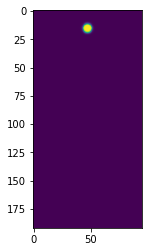

In [16]:
%matplotlib inline

plt.imshow(rho2D_48)

# Mesh grid:

In [17]:
print(mesh.bounds[3])

22.0


In [18]:
# Coordinates:

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)
z = np.linspace(mesh.bounds[4], mesh.bounds[5], mesh.dimensions[2] - 1)


In [19]:
# Coordinates:

x1 = np.arange(mesh.bounds[0], mesh.bounds[1], (mesh.bounds[1] - mesh.bounds[0])/(mesh.dimensions[0] - 1))
y1 = np.arange(mesh.bounds[2], mesh.bounds[3], (mesh.bounds[3] - mesh.bounds[2])/(mesh.dimensions[1] - 1))
z1 = np.arange(mesh.bounds[4], mesh.bounds[5], (mesh.bounds[5] - mesh.bounds[4])/(mesh.dimensions[2] - 1))


In [20]:
print(x1[1] - x1[0])
print(y1[1] - y1[0])

0.125
0.125


In [21]:
print(y)

[-2.00000000e+00 -1.87434555e+00 -1.74869110e+00 -1.62303665e+00
 -1.49738220e+00 -1.37172775e+00 -1.24607330e+00 -1.12041885e+00
 -9.94764398e-01 -8.69109948e-01 -7.43455497e-01 -6.17801047e-01
 -4.92146597e-01 -3.66492147e-01 -2.40837696e-01 -1.15183246e-01
  1.04712042e-02  1.36125654e-01  2.61780105e-01  3.87434555e-01
  5.13089005e-01  6.38743455e-01  7.64397906e-01  8.90052356e-01
  1.01570681e+00  1.14136126e+00  1.26701571e+00  1.39267016e+00
  1.51832461e+00  1.64397906e+00  1.76963351e+00  1.89528796e+00
  2.02094241e+00  2.14659686e+00  2.27225131e+00  2.39790576e+00
  2.52356021e+00  2.64921466e+00  2.77486911e+00  2.90052356e+00
  3.02617801e+00  3.15183246e+00  3.27748691e+00  3.40314136e+00
  3.52879581e+00  3.65445026e+00  3.78010471e+00  3.90575916e+00
  4.03141361e+00  4.15706806e+00  4.28272251e+00  4.40837696e+00
  4.53403141e+00  4.65968586e+00  4.78534031e+00  4.91099476e+00
  5.03664921e+00  5.16230366e+00  5.28795812e+00  5.41361257e+00
  5.53926702e+00  5.66492

In [22]:
print(x.size)

96


In [23]:
X, Y = np.meshgrid(x1, y1)

In [24]:
print(X.shape)
print(Y.shape)

(192, 96)
(192, 96)


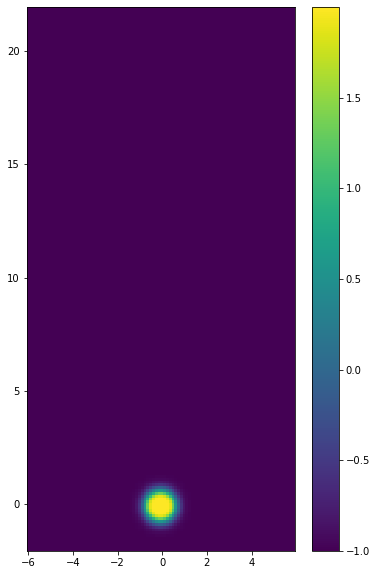

In [25]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, np.log10(rho2D_48), shading='auto')

plt.colorbar(Z)

plt.show()

In [26]:
rho2D_00 = rho3D[0, :, :]

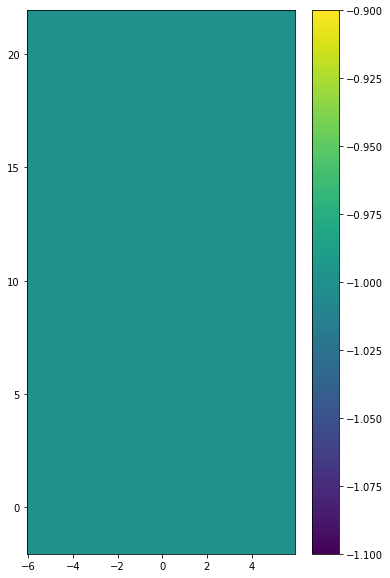

In [27]:
plt.figure(figsize = (6, 10))

Z = plt.pcolor(X, Y, np.log10(rho2D_00), shading='auto')

plt.colorbar(Z)

plt.show()

## Integrated quantities

### Example 1:

Compute the mass:

$M = \int\int\int \rho\,dV = \sum_i \sum_j \sum_k \rho_{i,j,k}\Delta V_{i,j,k}$

The grid is uniform:

$M = \int\int\int \rho\,dV = \Delta V\,\sum_i \sum_j \sum_k \rho_{i,j,k}$

$M = \Delta x^3\,\sum_i \sum_j \sum_k \rho_{i,j,k}$

In [28]:
# Delta x

delta_x = x1[1] - x1[0]
delta_y = y1[1] - y1[0]
delta_z = z1[1] - z1[0]

print(delta_x, delta_y, delta_z)

0.125 0.125 0.125


In [29]:
# mass

total_mass = np.sum(rho3D)*delta_x**3

In [30]:
print(total_mass)

406.5387878417969


In [31]:
total_mass1 = (delta_x**3)*np.sum(np.sum(np.sum(rho3D, axis = 2), axis =1), axis = 0)

In [32]:
print(total_mass1)

406.53814697265625


In [33]:
24/192

0.125

### Example 2:

Compute the column density:

$\rho_A = \int \rho\,dy = \sum_j \rho_{i,j,k}\Delta y$

The grid is uniform:

$\rho_A = \Delta y\, \sum_j \rho_{i,j,k}$

In [34]:
# Projected 2D density:

rho_A = delta_y*np.sum(rho3D, axis = 1)

In [35]:
print(rho_A.shape)

(96, 96)


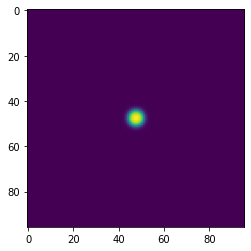

In [36]:
plt.imshow(rho_A)

### Example 3:

Compute the linear density:

$\rho_l = \int \rho\,dy\,dz$

In [37]:
# Projected linear density:

rho_l = delta_y**2*np.sum(np.sum(rho3D, axis = 1), axis = 0)

In [38]:
print(rho_l.shape)

(96,)


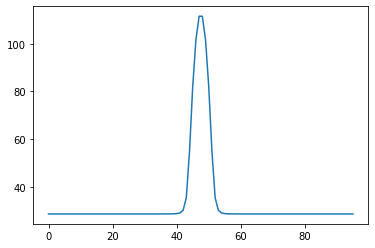

In [39]:
plt.plot(rho_l)

### Example 4:  Centre of mass


$cm_x = \frac{\int \rho\,x\,dV}{\int \rho\,dV}$

$cm_x = \frac{\int \rho\,y\,dV}{\int \rho\,dV}$

$cm_z = \frac{\int \rho\,z\,dV}{\int \rho\,dV}$


In [40]:
cmx = np.sum(np.sum(np.sum(rho3D,axis=2),axis=1)*(x))/np.sum(rho3D) 

cmy = np.sum(np.sum(np.sum(rho3D,axis=2),axis=0)*(y))/np.sum(rho3D) 

cmz = np.sum(np.sum(np.sum(rho3D,axis=1),axis=0)*(z))/np.sum(rho3D) 

In [41]:
print(cmx, cmy, cmz)

1.7477858374404495e-16 8.493178390076352 2.4469001724166293e-16
